In [1]:
# importing
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use("seaborn")
from scipy import stats
from scipy import fftpack

1\. **Hurricanes per Year**

The number of hurricanes in 2005 was 15. The historic average is 6.3. Is this number signficantly different?
- Assume the number of hurricanes is random, i.e. follows the Poisson distribution.
- Assume as statistically significant a probability that has a Z score of 3 or larger with respect a normal distribution.

**Hint**: compute the probability that in a single year are observed 15 or more hurricances.

Probability of observing 15 or more hurricanes (if poisson ditributed): 0.084%
The probability of having a Z score larger than 3 w.r.t. a normal distribution is 0.270%
The probability of observing 15 hurricanes is less than the probability of observing a sample further away than 3 std from the mean of a normal distribution:  True


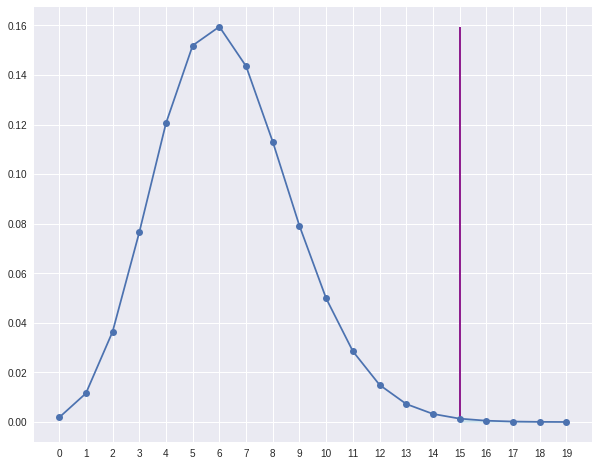

In [2]:
with plt.rc_context({'figure.figsize' : [10,8]}):
    mu = 6.3
    x = np.arange(0,20)
    fig,ax=plt.subplots()
    ax.plot(x,stats.poisson.pmf(x,mu=mu),marker='o')
    ax.fill_between(x[15:],stats.poisson.pmf(x[15:],mu=mu),alpha=0.5,color='lightblue')
    # ax.set_yscale('log')
    ax.vlines(x[15],0,np.max(stats.poisson.pmf(x,mu=mu)),color='purple')
    ax.set_xticks(x)
    

    prob = 1-stats.poisson.cdf(15,mu=mu)
    print("Probability of observing 15 or more hurricanes (if poisson ditributed): {:.3%}".format(prob))
    Z= 3
    print("The probability of having a Z score larger than 3 w.r.t. a normal distribution is {:.3%}".format(stats.norm.cdf(-Z) + (1. - stats.norm.cdf(Z))))
    print("The probability of observing 15 hurricanes is less than the probability of observing a sample further away than 3 std from the mean of a normal distribution: ",(prob<stats.norm.cdf(-Z) + (1. - stats.norm.cdf(Z))))
    


2\. **Pairwise t-test**

In an experiment, a group of 10 individuals agreed to participate in a study of blood pressure changes following exposure to halogen lighting. Resting systolic blood pressure was recorded for each individual. The participants were then exposed to 20 minutes in a room lit only by halogen lamps. A post-exposure systolic blood pressure reading was recorded for each individual. The results are presented in the following data set:

```python
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])
```

Determine whether the change in blood pressures within our sample was statistically significant.

**Hint:**
in this case, the Student's $t$-test should be performed to compare the two datasets.
Use the following test statistics:

$$T = \frac{\bar{x}_1 - \bar{x}_2}{\sigma \sqrt{\frac{2}{n}}}$$

and 

$$\sigma = \sqrt{\frac{\sigma_1^2 + \sigma_2^2}{2}}$$

-5.64532321355152 20


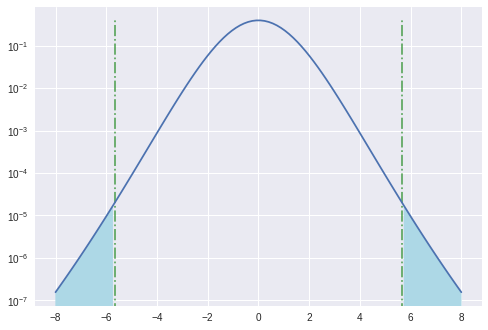

P-value = 0.002%
P-value is less than alpha/2=0.025 : True
The probability of getting a pre-post mean difference this big is lower than our assumed alpha parameter;
the samples are to be considered significantly different.


In [3]:
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])
alpha=0.05

def test_statistics(x1,x2):
    n = x1.size + x2.size #should n be the length of both arrays or just one?
    sigma=((np.var(x1)+np.var(x2))/2)**(0.5)
    return (np.mean(x1)-np.mean(x2))/(sigma*((2/n)**(0.5))),n 

T,n=test_statistics(pre,post)
print(T,n)
# T is a random variable: it follows the t-student distribution with n-1 degrees of freedom.
# this t student distribution tells us the probability of getting a certain value of T (defined as such) 
# if the samples are drawn from gaussians. it doesnt depend on said gaussians' mean and variance


fig,ax = plt.subplots()
x = np.linspace(-8,8,100)
ts = stats.t.pdf(x,n-1)
ax.plot(x,ts)
ax.vlines([-T,T],0,ts.max(),linestyle='-.',alpha=0.7,color='forestgreen')
ax.set_yscale('log')
ax.fill_between(x, ts, where=np.abs(x) > np.abs(T), color='lightblue')

plt.show()

pvalue = stats.t.cdf(T, n - 1) + (1. - stats.t.cdf(-T, n - 1))
print("P-value = {:.3%}".format(pvalue))
less = pvalue<alpha/2
print("P-value is less than alpha/2={} : {}".format(alpha/2,less))
if less: print("The probability of getting a pre-post mean difference this big is lower than our assumed alpha parameter;\nthe samples are to be considered significantly different.")


3\. **FFT of a simple dataset**

Perform a periodicity analysis on the lynxs-hares population, i.e. determine what is the period of the population of these animals.

Prominent period (years) of hare population:  5.6875
Prominent period (years) of lynx population:  5.352941176470588


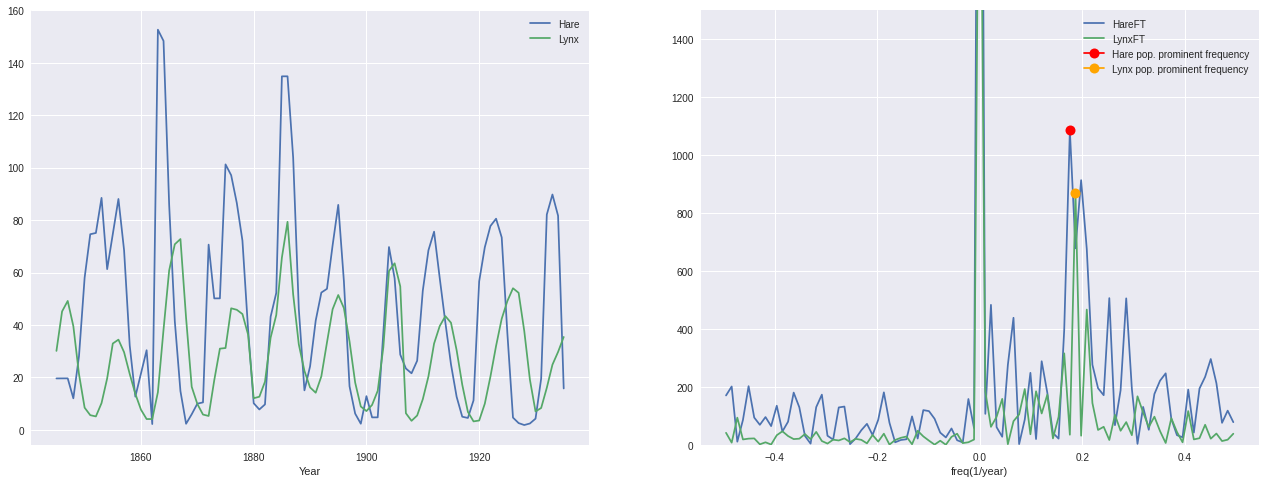

In [4]:
url='http://people.whitman.edu/~hundledr/courses/M250F03/LynxHare.txt'
df = pd.read_csv(url, delim_whitespace=True, header=None, index_col=0)
df.index.name = 'Year'
df.columns = ['Hare', 'Lynx']

# using rfft instead of fft because it is more efficient on real scalar data, skipping the computation of negative frequencies whose coefficients are the complex conjugate
dfft = pd.DataFrame.from_dict({'freq(1/year)':fftpack.fftfreq(df['Hare'].values.size),'HareFT':np.abs(fftpack.rfft(df['Hare'].values)),'LynxFT':np.abs(fftpack.rfft(df['Lynx'].values))})
dfft.sort_values('freq(1/year)',inplace=True)


with plt.rc_context({'figure.figsize' : [22,8]}):
    fig,axs=plt.subplots(1,2)

    df[['Hare','Lynx']].plot(ax=axs[0])
    dfft.plot(x='freq(1/year)',ax=axs[1])

    # finding frequency peak excluding zero-frequency coefficients
    hare_max=dfft.sort_values('HareFT').iloc[-2]
    axs[1].plot(hare_max['freq(1/year)'],hare_max['HareFT'],color='r',marker='o',markersize=10,label='Hare pop. prominent frequency')
    lynx_max=dfft.sort_values('LynxFT').iloc[-2]
    axs[1].plot(lynx_max['freq(1/year)'],lynx_max['LynxFT'],color='orange',marker='o',markersize=10,label='Lynx pop. prominent frequency')

    axs[1].set_ylim(0,1500)


    print("Prominent period (years) of hare population: ", hare_max['freq(1/year)']**(-1))
    print("Prominent period (years) of lynx population: ", lynx_max['freq(1/year)']**(-1))
    for ax in axs: ax.legend()

4\. **FFT of an image**

Write a filter that removes the periodic noise from the `moonlanding.png` image by using a 2-dimensional FFT.

* Import the image as a 2D numpy array using `plt.imread("moonlanding.png")`. Examine the image with `plt.imshow()`, which is heavily contaminated with periodic noise.
* Check the documentation of the `scipy.fftpack` package, and find the method that performs a 2D FFT. Plot the spectrum (Fourier transform of) the image. **Hint**: use `LogNorm` to plot the colors in log scale:
```Python
from matplotlib.colors import LogNorm
plt.imshow(image, norm=LogNorm(vmin=5))
```
* Inspect the spectrum, and try to locate the regions of the power spectrum that contain the signal and those which contain the periodic noise. Use array slicing to set the noise regions to zero.
* Apply the inverse Fourier transform to plot the resulting image.

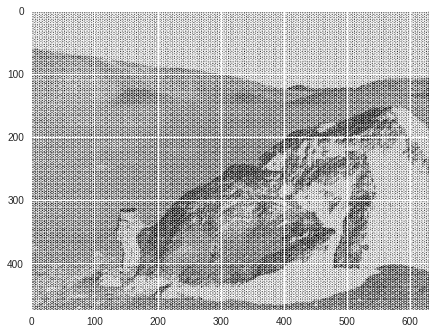

In [5]:
im = plt.imread("moonlanding.png")
plt.imshow(im)

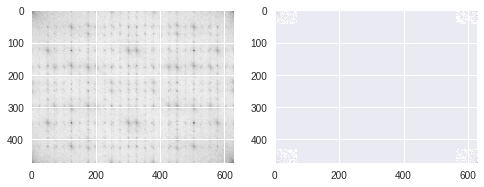

In [6]:
fig, axes = plt.subplots(1,2)

from matplotlib.colors import LogNorm

ft = fftpack.fft2(im)
axes[0].imshow(np.abs(ft),norm=LogNorm(vmin=5))
i = 40
j= 65
filtered = np.copy(ft)
filtered[i:-i,:]=0
filtered[:,j:-j]=0

axes[1].imshow(filtered.real,norm=LogNorm(vmin=5))


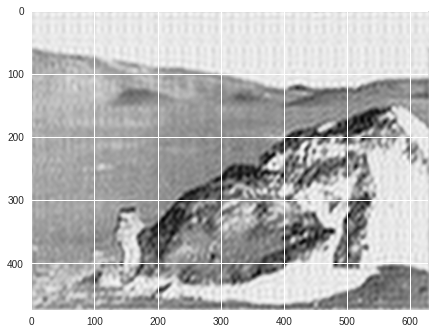

In [7]:
fil_im=fftpack.ifft2(filtered).real
plt.imshow(fil_im)